In [2]:
""" polynomial_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn



Function to generate dataset with four input: polynomial degree, beta coefficient, sigma noise, and the amount of data. It will return the value of u and y.

In [3]:
def generate_data(p, beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
   return u, y


This part generates the dataset.

In [ ]:
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(3, beta , sig, n)

This function creates the model matrix based on u that has been created before.

In [7]:
def model_matrix(p, u):
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X

This function trains the model matrix with y to find the betahat value.

In [8]:
def train(X, y):
    betahat = solve(X.T @ X, X.T @ y)
    return betahat

Then we build 3 models with different polynomial degrees (1, 3, 15). And we store 3 result of model matrices and betahats.

In [9]:
X, betahat = {},{}
ps = [1, 3, 15]
for p in ps:
   X[p] = model_matrix(p, u) 
   betahat[p] = train(X[p], y)

This function will find the loss value (mean squared error).

In [10]:
def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

Generate test data and we calculate both training loss and test loss value from training set and test set.

In [15]:
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)
     print("Training loss ", p, ": ", training_loss[p])
     print("Test loss ", p, ": ",  test_loss[p])

Training loss  1 :  43.60475602972198
Test loss  1 :  50.273137851339854
Training loss  3 :  20.41850740702961
Test loss  3 :  23.297994933749045
Training loss  15 :  18.853782515308772
Test loss  15 :  27.165294344377056


Draw the plot to see the comparison of our generated curves with the true curve line.

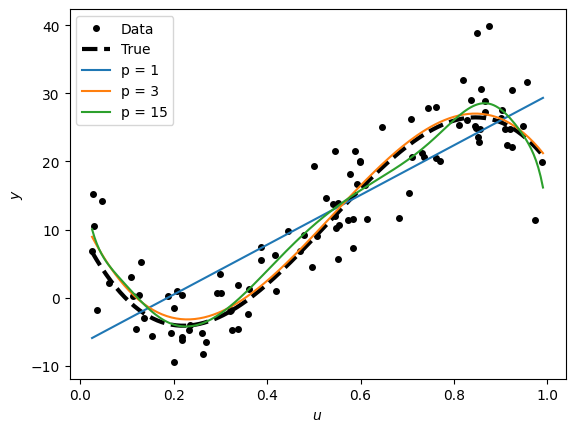

In [ ]:
#Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
# I add legend to distinguish each curve
plt.legend(["Data", "True", "p = 1", "p = 3", "p = 15"])
plt.show()

### Question number 2
I observed that from the visual graph, the curve that is closest to the original function is the training curve with polynomial degree 3. The polynomial-degree-1-curve is underfitting while  the polinomial-degree-15-curve potentially overfitting.

### Question number 3
1. The shape of the training curve is different because it was generated from a new dataset. The model curve that most closely matches the true curve is the one that most closely matches the true degree polynomial.

2. For a sigma value equal to 0, the data will converge precisely on the true curve, making it easier to find a fitting model. Conversely, the larger the sigma, the further the data will be from the center of the true curve, making it more challenging to find the right model.

3. The less data, the easier it is to overfit, meaning it will be difficult to predict new data. On the other hand, the more data, the easier it will be to find the optimal model.

### Question number 4
1. Testing with a different test distribution than the training features will result in a high test loss, which also makes it difficult to predict an accurate model.

2. If the feature variable is in a similar range, but highly concentrated towards particular (less informative) parts of the distribution, then the model only able to predict some subset of particular data correctly.

### Question number 5

The use of k-fold cross validation can improve model accuracy, especially in certain scenarios, such as when the number of data points is small, or there are data anomalies (for example, skewed).